 # I- Clustering des données synthétiques via K-means

In [31]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
 [[ 0.2, 2.3],
 [-1.5 , 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# "X" représente les données et "y" représente les indices de clusters réels
X, y = make_blobs(n_samples=2000, centers=blob_centers,
 cluster_std=blob_std, random_state=7)

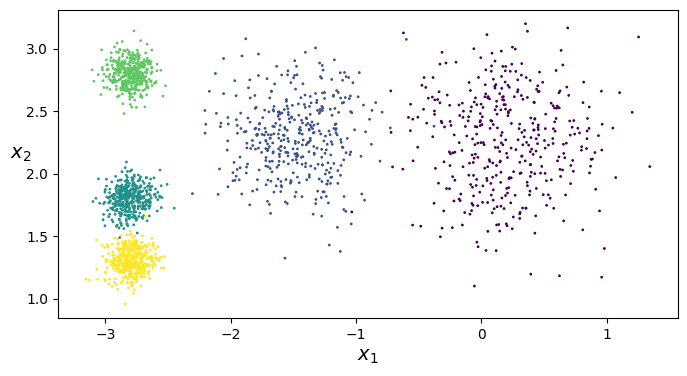

In [32]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None, centroids=None):
 plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
 if centroids is not None:
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='red')
 plt.xlabel("$x_1$", fontsize=14)
 plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X, y)
plt.show()

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

# 5. Appliquer la méthode KMeans avec k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # n_init is set to 10 to suppress a warning

# 6. En utilisant la méthode fit_predict, prédisez et affichez les indices des cluster de X.
y_pred = kmeans.fit_predict(X)

# Afficher les indices des clusters prédits
print("Indices des clusters prédits:")
print(y_pred)

# 7. Calculer le NMI
nmi_score = normalized_mutual_info_score(y, y_pred)
print(f"\nNormalized Mutual Information (NMI) score: {nmi_score}")

Indices des clusters prédits:
[0 0 4 ... 3 1 0]

Normalized Mutual Information (NMI) score: 0.8412804765645479


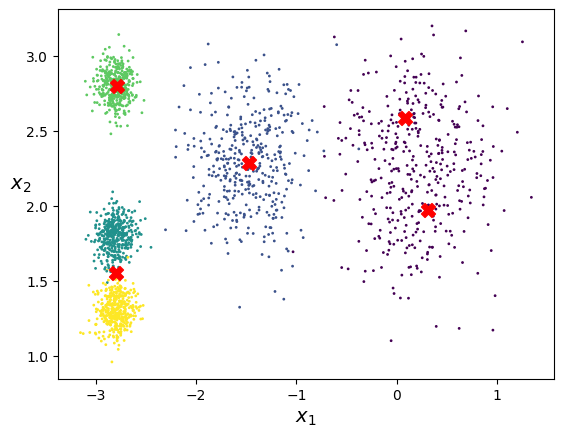

In [34]:
# 8. Intégrer les centroïdes dans la figure
plot_clusters(X, y, kmeans.cluster_centers_)
plt.show()

In [35]:
#9.
# a. Créer la nouvelle instance
X_new = np.array([[-3, 2.5]])

# b. Calculer la distance de X_new aux centroïdes
distances = kmeans.transform(X_new)
print("Distances de X_new aux centroïdes:")
print(distances)

# Trouver l'indice du cluster avec le centroïde le plus proche
closest_cluster_index = np.argmin(distances)
print(f"\nLe cluster avec le centroïde le plus proche de X_new est le cluster {closest_cluster_index}")

# c. Prédire l'indice du cluster de X_new
predicted_cluster = kmeans.predict(X_new)
print(f"\nL'indice du cluster prédit pour X_new est : {predicted_cluster[0]}")

# Vérifier si l'indice prédit est conforme avec la réponse à la question 9.b
if predicted_cluster[0] == closest_cluster_index:
 print("L'indice du cluster prédit est conforme avec la réponse à la question 9.b.")
else:
 print("L'indice du cluster prédit n'est pas conforme avec la réponse à la question 9.b.")

Distances de X_new aux centroïdes:
[[0.96879317 3.08818836 1.54672634 0.36159148 3.35573094]]

Le cluster avec le centroïde le plus proche de X_new est le cluster 3

L'indice du cluster prédit pour X_new est : 3
L'indice du cluster prédit est conforme avec la réponse à la question 9.b.


# II- Clustering des images faciales via K-means

In [36]:
from sklearn.datasets import fetch_olivetti_faces

# 11. Importer la base de données
olivetti_faces = fetch_olivetti_faces()

# 12. Afficher la description
print("Description de la base de données:")
print(olivetti_faces.DESCR)

# 13. Afficher les indices de cluster (cible)
print("\nIndices des clusters (target):")
print(olivetti_faces.target)

# 14. Afficher les données
print("\nDonnées (data):")
print(olivetti_faces.data)

Description de la base de données:
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   ========

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# 15. Diviser la base de données
X = olivetti_faces.data
y = olivetti_faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print("Dimensions des ensembles de données après division:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")
print(f"y_test: {y_test.shape}")

# 16. Appliquer KMeans sur les données d'apprentissage avec k=40
kmeans_faces = KMeans(n_clusters=40, random_state=42, n_init=10)
kmeans_faces.fit(X_train)

# 17. Prédire les indices de cluster des données de validation
y_val_pred = kmeans_faces.predict(X_val)

# Afficher les indices des clusters prédits pour la validation
print("\nIndices des clusters prédits pour l'ensemble de validation:")
print(y_val_pred)

Dimensions des ensembles de données après division:
X_train: (240, 4096)
X_val: (80, 4096)
X_test: (80, 4096)
y_train: (240,)
y_val: (80,)
y_test: (80,)

Indices des clusters prédits pour l'ensemble de validation:
[ 1  8 31  7 15  6 13 20 33  5 15  1 18 36  1 23  7 33 28 38  1  0  4 18
  8 20 17 35 39 15 17 38  6 24  4 13  5 29 18  7 23 23  4 22  7 19 39  5
 39  0 20 39  0  5 35 39  6 37 37 12 38 37 12 37  5 16  9  0 39 35 39 39
  6 18  6 35 20 19 28  7]


Normalized Mutual Information (NMI) score pour les visages: 0.8373253357325356

Images faciales de validation regroupées par cluster prédit:

Cluster 0:


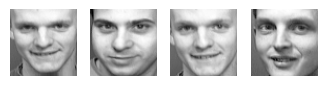


Cluster 1:


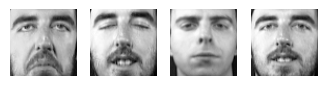


Cluster 4:


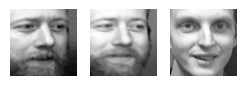


Cluster 5:


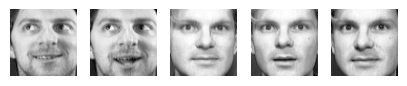


Cluster 6:


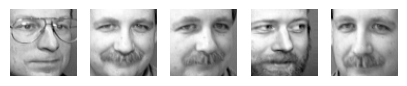


Cluster 7:


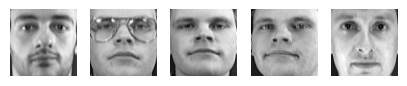


Cluster 8:


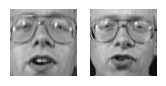


Cluster 9:


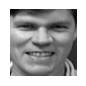


Cluster 12:


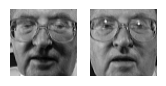


Cluster 13:


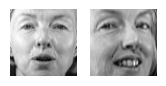


Cluster 15:


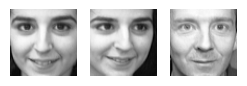


Cluster 16:


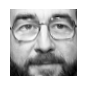


Cluster 17:


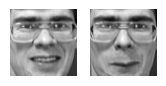


Cluster 18:


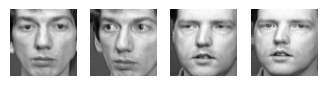


Cluster 19:


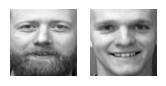


Cluster 20:


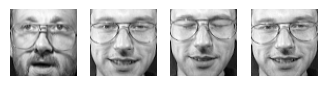


Cluster 22:


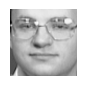


Cluster 23:


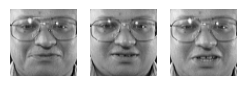


Cluster 24:


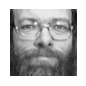


Cluster 28:


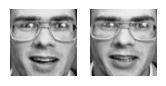


Cluster 29:


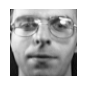


Cluster 31:


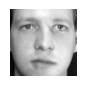


Cluster 33:


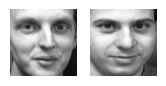


Cluster 35:


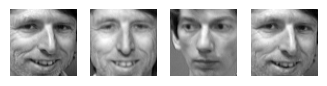


Cluster 36:


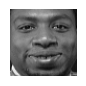


Cluster 37:


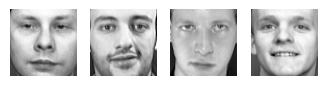


Cluster 38:


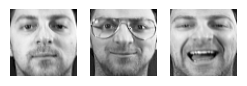


Cluster 39:


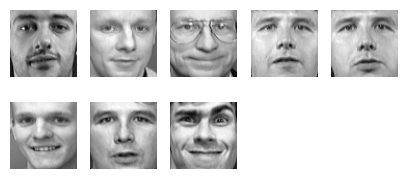

In [39]:
from sklearn.metrics import normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

# 18. Calculez le NMI
nmi_faces_score = normalized_mutual_info_score(y_val, y_val_pred)
print(f"Normalized Mutual Information (NMI) score pour les visages: {nmi_faces_score}")

# 19. Proposez un code qui appelle la fonction ci-dessous et affiche les images faciales de validation et leurs cluster
def plot_faces(faces, n_cols=5):
 n_rows = (len(faces) - 1) // n_cols + 1
 plt.figure(figsize=(n_cols, n_rows * 1.1))
 for index in range(0, len(faces)):
  plt.subplot(n_rows, n_cols, index + 1)
  plt.imshow(faces[index].reshape(64, 64), cmap="gray")
  plt.axis("off")
 plt.show()

# Group validation faces by predicted cluster and display them
print("\nImages faciales de validation regroupées par cluster prédit:")
unique_clusters = np.unique(y_val_pred)
for cluster in unique_clusters:
 print(f"\nCluster {cluster}:")
 cluster_indices = np.where(y_val_pred == cluster)[0]
 cluster_faces = X_val[cluster_indices]
 plot_faces(cluster_faces)